# Classification Modeling

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, ConfusionMatrixDisplay

In [3]:
plt.rcParams['figure.figsize'] = (10, 6)
sns.set_style("darkgrid")

In [4]:
df = pd.read_csv('data/churn.csv')

We are not removing any outliers from this dataset, so we will use the original data. 

In [5]:
df['churn'].value_counts(normalize=True)

churn
False    0.855086
True     0.144914
Name: proportion, dtype: float64

The most common churn is False at 85.51%, so this will be our baseline for determining if our classification models do well. 

In [6]:
def model_factory(model, columns):
    preprocessor = ColumnTransformer(
        transformers=[
            ('num', StandardScaler(), columns)
        ],
        remainder='passthrough'
    )
    model = Pipeline(
        steps=[
            ('preprocess', preprocessor),
            ('model', model)
        ]
    )
    return model

## Logisitic Regression and Random Forest

In [40]:
df.columns

Index(['account_length', 'vmail_message', 'day_mins', 'day_calls',
       'day_charge', 'eve_mins', 'eve_calls', 'eve_charge', 'night_mins',
       'night_calls', 'night_charge', 'intl_mins', 'intl_calls', 'intl_charge',
       'custserv_calls', 'churn'],
      dtype='object')

In [52]:
cols = ['day_charge', 'eve_charge', 'night_charge', 'intl_charge', 'custserv_calls']

In [53]:
# X = df.drop(columns=['churn', 'intl_mins', 'intl_calls', 'account_length', 'vmail_message', 'day_mins', 'day_calls','eve_mins', 'eve_calls', 'night_mins',
#        'night_calls'])
X = df[cols]
y = df['churn']

In [54]:
scores = []

for i in np.arange(0.2, 0.4, 0.01):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=i, random_state=42, stratify=y)
    
    logreg = model_factory(LogisticRegression(), X.columns)
    rf = model_factory(RandomForestClassifier(random_state=42), X.columns)
    
    logreg.fit(X_train, y_train)
    
    log_score = logreg.score(X_test, y_test)
    
    rf.fit(X_train, y_train)
    
    rf_score = rf.score(X_test, y_test)

    scores.append({'Logistic Regression': log_score, 'Random Forest': rf_score, 'test_size': i})

In [55]:
score_df=  pd.DataFrame(scores)

In [56]:
score_df.sort_values(by='Random Forest', ascending=False)

,Logistic Regression,Random Forest,test_size
8,0.850107,0.914347,0.28
10,0.853000,0.910000,0.30
9,0.852120,0.908997,0.29
4,0.848750,0.908750,0.24
13,0.853636,0.907273,0.33
12,0.851921,0.907216,0.32
19,0.854615,0.906923,0.39
14,0.853616,0.906526,0.34
5,0.847722,0.906475,0.25
11,0.852031,0.906190,0.31


In [57]:
score_df.sort_values(by='Logistic Regression', ascending=False)

,Logistic Regression,Random Forest,test_size
19,0.854615,0.906923,0.39
18,0.853986,0.906077,0.38
13,0.853636,0.907273,0.33
14,0.853616,0.906526,0.34
15,0.853470,0.905741,0.35
10,0.853000,0.910000,0.30
17,0.852512,0.905997,0.37
16,0.852500,0.900000,0.36
9,0.852120,0.908997,0.29
11,0.852031,0.906190,0.31


Text(0, 0.5, 'Accuracy Score')

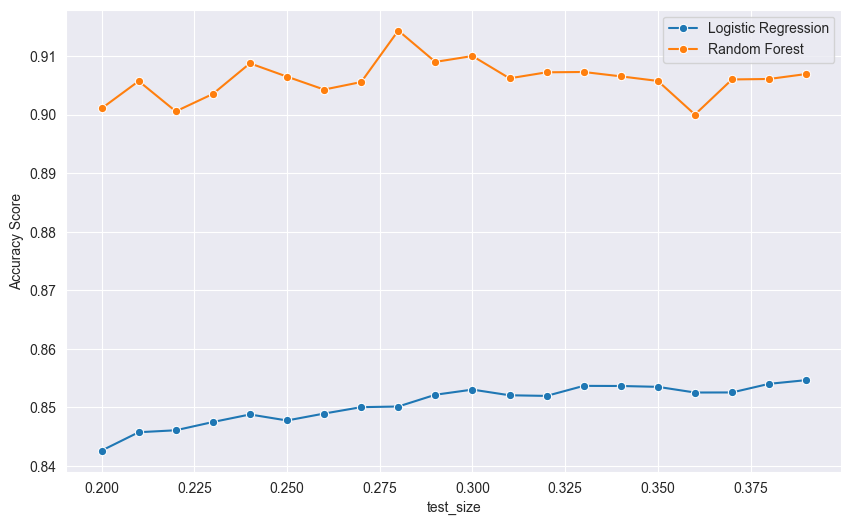

In [58]:
sns.lineplot(data=score_df, x='test_size', y='Logistic Regression', marker='o', label='Logistic Regression')
sns.lineplot(data=score_df, x='test_size', y='Random Forest', marker='o', label='Random Forest')
plt.legend()
plt.ylabel("Accuracy Score")

> we can see with the above lineplots, Random Forest performs best with a test size of 27%, meaning a 73/27 split for training and testing data, getting an accuracy score of ~93%. Logistic Regression peaked at a test size of 33%, with a score of 86%.
>
> Next we will look at KNN with differnt neighbor and test sizes

## KNN

In [39]:
break

SyntaxError: 'break' outside loop (668683560.py, line 1)

In [30]:
scores = []

for i in np.arange(0.2, 0.4, 0.01):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=i, random_state=42, stratify=y)
    
    for neighbor in range(3, 31, 2):
        knn = model_factory(KNeighborsClassifier(n_neighbors=neighbor), X.columns)
        knn.fit(X_train, y_train)
        knn_score = knn.score(X_test, y_test)
        scores.append({'n': neighbor, 'score': knn_score, 'test_size': i})
    

In [31]:
score_df = pd.DataFrame(scores)

In [32]:
score_df.sort_values(by='score', ascending=False)

,n,score,test_size
170,7,0.891284,0.32
156,7,0.890716,0.31
128,7,0.890383,0.29
212,7,0.890317,0.35
184,7,0.890000,0.33
...,...,...,...
56,3,0.871250,0.24
279,29,0.870769,0.39
28,3,0.866485,0.22
14,3,0.862857,0.21


> For KNN, the best params found were 7 neighbors, and a test size of 0.32, getting a score of ~89.13%. However, this still did not beat random forest, so we will use that model. 

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.27, random_state=42, stratify=y)
    
rf = model_factory(RandomForestClassifier(random_state=42), X.columns)

In [34]:
rf.fit(X_train, y_train)

,steps,"[('preprocess', ...), ('model', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('num', ...)]"
,remainder,'passthrough'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [35]:
rf_preds = rf.predict(X_test)

In [36]:
print(classification_report(y_test, rf_preds))

              precision    recall  f1-score   support

       False       0.93      0.99      0.96       770
        True       0.91      0.55      0.68       130

    accuracy                           0.93       900
   macro avg       0.92      0.77      0.82       900
weighted avg       0.93      0.93      0.92       900



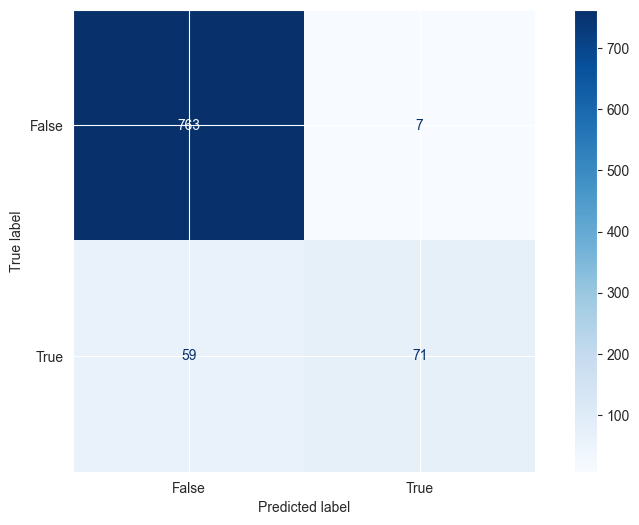

In [38]:
ConfusionMatrixDisplay.from_estimator(rf, X_test, y_test, cmap='Blues')